In [ ]:
# ANÁLISE E CRIAÇÂO DE MODELO PREDITIVO PARA TAXA DE ABSENTEÍSMO EM DADOS DA RAIS

In [2]:
import dask.dataframe as dd
import dask.bag as db
#db.read_text
#dd.read_csv('RAIS_VINC_PUB_SUL.txt',  encoding='latin-1', sep=';', engine= 'python', header = None)

In [3]:
#RAIS_VINC_PUB_CENTRO_OESTE.txt, RAIS_VINC_PUB_MG_ES_RJ.txt, RAIS_VINC_PUB_NORDESTE.txt, RAIS_VINC_PUB_NORTE.txt, RAIS_VINC_PUB_SP.txt, RAIS_VINC_PUB_SUL.txt

In [4]:
RAIS_VINC_PUB_CENTRO_OESTE = dd.read_csv('RAIS_VINC_PUB_CENTRO_OESTE.txt',  encoding='latin-1', sep=';', engine= 'python',dtype={'CBO Ocupação 2002': 'object',
       'Mês Desligamento': 'object', 'Bairros SP': 'object','Distritos SP': 'object'})
RAIS_VINC_PUB_MG_ES_RJ = dd.read_csv('RAIS_VINC_PUB_MG_ES_RJ.txt',  encoding='latin-1', sep=';', engine= 'python',dtype={'CBO Ocupação 2002': 'object',
       'Mês Desligamento': 'object', 'Bairros SP': 'object','Distritos SP': 'object'})
RAIS_VINC_PUB_NORDESTE = dd.read_csv('RAIS_VINC_PUB_NORDESTE.txt',  encoding='latin-1', sep=';', engine= 'python',dtype={'CBO Ocupação 2002': 'object',
       'Mês Desligamento': 'object', 'Bairros SP': 'object','Distritos SP': 'object'})

In [5]:
RAIS_VINC_PUB_NORTE = dd.read_csv('RAIS_VINC_PUB_NORTE.txt',  encoding='latin-1', sep=';', engine= 'python',dtype={'CBO Ocupação 2002': 'object',
       'Mês Desligamento': 'object', 'Bairros SP': 'object','Distritos SP': 'object'})
RAIS_VINC_PUB_SP = dd.read_csv('RAIS_VINC_PUB_SP.txt',  encoding='latin-1', sep=';', engine= 'python',dtype={'CBO Ocupação 2002': 'object',
       'Mês Desligamento': 'object', 'Bairros SP': 'object','Distritos SP': 'object'})
RAIS_VINC_PUB_SUL = dd.read_csv('RAIS_VINC_PUB_SUL.txt',  encoding='latin-1', sep=';', engine= 'python',dtype={'CBO Ocupação 2002': 'object',
       'Mês Desligamento': 'object', 'Bairros SP': 'object','Distritos SP': 'object'})

In [6]:
df = dd.concat([RAIS_VINC_PUB_CENTRO_OESTE, RAIS_VINC_PUB_MG_ES_RJ, RAIS_VINC_PUB_NORDESTE,RAIS_VINC_PUB_NORTE,RAIS_VINC_PUB_SP,RAIS_VINC_PUB_SUL])

In [7]:
df.dtypes

Bairros SP                 object
Bairros Fortaleza          object
Bairros RJ                 object
Causa Afastamento 1         int64
Causa Afastamento 2         int64
Causa Afastamento 3         int64
Motivo Desligamento         int64
CBO Ocupação 2002          object
CNAE 2.0 Classe             int64
CNAE 95 Classe              int64
Distritos SP               object
Vínculo Ativo 31/12         int64
Faixa Etária                int64
Faixa Hora Contrat          int64
Faixa Remun Dezem (SM)      int64
Faixa Remun Média (SM)      int64
Faixa Tempo Emprego         int64
Escolaridade após 2005      int64
Qtd Hora Contr              int64
Idade                       int64
Ind CEI Vinculado           int64
Ind Simples                 int64
Mês Admissão                int64
Mês Desligamento           object
Mun Trab                    int64
Município                   int64
Nacionalidade               int64
Natureza Jurídica           int64
Ind Portador Defic          int64
Qtd Dias Afast

In [56]:
#df.astype('object').dtypes

In [34]:
#df['CBO Ocupação 2002'] = df['CBO Ocupação 2002'].astype(str)
#df['Mês Desligamento'] = df['Mês Desligamento'].astype(str)

In [57]:
df.head()

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,...,Vl Rem Maio SC,Vl Rem Junho SC,Vl Rem Julho SC,Vl Rem Agosto SC,Vl Rem Setembro SC,Vl Rem Outubro SC,Vl Rem Novembro SC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
0,{ñ class},{ñ class},{ñ class},99,99,99,11,632610,2209,2127,...,"000000010,45","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
1,{ñ class},{ñ class},{ñ class},99,99,99,11,717020,41107,70106,...,"000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
2,{ñ class},{ñ class},{ñ class},99,99,99,90,621005,16102,20109,...,"000000011,21","000000011,21","000000011,21","000000011,21","000000011,21","000000000,00","000000000,00",0,0,0
3,{ñ class},{ñ class},{ñ class},99,99,99,11,784205,10651,15555,...,"000000018,85","000000018,85","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
4,{ñ class},{ñ class},{ñ class},99,99,99,10,724315,22226,25224,...,"000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0


In [8]:
df.to_parquet(r'C:\Users\PC\Desktop\Data_Enginner_PUC_Project\RAIS_VINC_PUB\RAIS_PARQUET_2020', compression='snappy', schema=None)

# Exploração dos dados

In [36]:
import dask.dataframe as dd
DF_RAIS = dd.read_parquet(r'C:\Users\PC\Desktop\Data_Enginner_PUC_Project\RAIS_VINC_PUB\RAIS_PARQUET_2020\*.parquet')

In [37]:
DF_RAIS.columns

Index(['Bairros SP', 'Bairros Fortaleza', 'Bairros RJ', 'Causa Afastamento 1',
       'Causa Afastamento 2', 'Causa Afastamento 3', 'Motivo Desligamento',
       'CBO Ocupação 2002', 'CNAE 2.0 Classe', 'CNAE 95 Classe',
       'Distritos SP', 'Vínculo Ativo 31/12', 'Faixa Etária',
       'Faixa Hora Contrat', 'Faixa Remun Dezem (SM)',
       'Faixa Remun Média (SM)', 'Faixa Tempo Emprego',
       'Escolaridade após 2005', 'Qtd Hora Contr', 'Idade',
       'Ind CEI Vinculado', 'Ind Simples', 'Mês Admissão', 'Mês Desligamento',
       'Mun Trab', 'Município', 'Nacionalidade', 'Natureza Jurídica',
       'Ind Portador Defic', 'Qtd Dias Afastamento', 'Raça Cor',
       'Regiões Adm DF', 'Vl Remun Dezembro Nom', 'Vl Remun Dezembro (SM)',
       'Vl Remun Média Nom', 'Vl Remun Média (SM)', 'CNAE 2.0 Subclasse',
       'Sexo Trabalhador', 'Tamanho Estabelecimento', 'Tempo Emprego',
       'Tipo Admissão', 'Tipo Estab', 'Tipo Estab.1', 'Tipo Defic',
       'Tipo Vínculo', 'IBGE Subsetor', 'Vl 

In [38]:
# DROP em colunas que iremos utilizar

In [39]:
DF_RAIS = DF_RAIS.drop(['Bairros SP',
                        'Bairros Fortaleza',
                        'Bairros RJ',
                        'Distritos SP',
                        'CNAE 95 Classe',
                        'Vl Rem Janeiro SC',
                        'Vl Rem Fevereiro SC',
                        'Vl Rem Março SC',
                        'Vl Rem Abril SC',
                        'Vl Rem Maio SC',
                        'Vl Rem Junho SC',
                        'Vl Rem Julho SC',
                        'Vl Rem Agosto SC',
                        'Vl Rem Setembro SC',
                        'Vl Rem Outubro SC',
                        'Vl Rem Novembro SC',
                        'Vl Remun Dezembro Nom',
                        'Vl Remun Dezembro (SM)',
                        'Vl Remun Média Nom',
                        'Vl Remun Média (SM)',
                        'CNAE 2.0 Classe',
                        'Faixa Remun Dezem (SM)',
                        'Faixa Remun Média (SM)',
                        'Ano Chegada Brasil',
                        'Escolaridade após 2005',
                        'Ind Portador Defic',
                        'Regiões Adm DF',
                        'Tipo Defic'], axis=1) 

In [40]:
DF_RAIS.columns

Index(['Causa Afastamento 1', 'Causa Afastamento 2', 'Causa Afastamento 3',
       'Motivo Desligamento', 'CBO Ocupação 2002', 'Vínculo Ativo 31/12',
       'Faixa Etária', 'Faixa Hora Contrat', 'Faixa Tempo Emprego',
       'Qtd Hora Contr', 'Idade', 'Ind CEI Vinculado', 'Ind Simples',
       'Mês Admissão', 'Mês Desligamento', 'Mun Trab', 'Município',
       'Nacionalidade', 'Natureza Jurídica', 'Qtd Dias Afastamento',
       'Raça Cor', 'CNAE 2.0 Subclasse', 'Sexo Trabalhador',
       'Tamanho Estabelecimento', 'Tempo Emprego', 'Tipo Admissão',
       'Tipo Estab', 'Tipo Estab.1', 'Tipo Vínculo', 'IBGE Subsetor',
       'Ind Trab Intermitente', 'Ind Trab Parcial'],
      dtype='object')

# FILTRANDO 'Vínculo Ativo 31/12' == 1 E 'Ind CEI Vinculado' == 1

In [41]:
DF_RAIS['Vínculo Ativo 31/12'].unique().compute()

0    0
1    1
Name: Vínculo Ativo 31/12, dtype: int64

In [42]:
DF_RAIS['Ind CEI Vinculado'].unique().compute()

0    0
1    1
Name: Ind CEI Vinculado, dtype: int64

In [42]:
DF_RAIS['Tipo Estab.1'].unique().compute()

0    CNPJ                
1    CAEPF               
2    CEI/CNO             
Name: Tipo Estab.1, dtype: object

In [43]:
DF_RAIS_Vínculo_Ativo_31_12_VALOR_1 = DF_RAIS.loc[DF_RAIS["Vínculo Ativo 31/12"] == 1]
DF_RAIS_Vínculo_Ativo_31_12_VALOR_1 = DF_RAIS_Vínculo_Ativo_31_12_VALOR_1.loc[DF_RAIS_Vínculo_Ativo_31_12_VALOR_1['Ind CEI Vinculado'] == 1]

In [44]:
DF_RAIS_Vínculo_Ativo_31_12_VALOR_1.to_parquet(r'C:\Users\PC\Desktop\Data_Enginner_PUC_Project\RAIS_VINC_PUB\RAIS_PARQUET_EXPLORADO', compression='snappy', schema=None)

# Trabalhando com RAIS Vinculo = 1

In [ ]:
DF_RAIS_Vínculo_Ativo_31_12_VALOR_1.to_parquet(r'C:\Users\PC\Desktop\Data_Enginner_PUC_Project\RAIS_VINC_PUB\RAIS_PARQUET_EXPLORADO', compression='snappy', schema=None)

In [1]:
import dask.dataframe as dd
DF_RAIS_1 = dd.read_parquet('././RAIS_PARQUET_EXPLORADO/*.parquet', npartitions=500)

In [2]:
DF_RAIS_1.head(npartitions=5)

,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Qtd Hora Contr,...,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Vínculo,IBGE Subsetor,Ind Trab Intermitente,Ind Trab Parcial
48871,99,99,99,0,517420,1,6,6,2,44,...,1,5,"5,5",2,1,CNPJ,10,15,0,0
48928,99,99,99,0,715505,1,7,6,1,44,...,1,3,"1,9",2,1,CNPJ,10,15,0,0
48961,40,40,40,0,717020,1,7,6,4,44,...,1,3,"22,9",0,1,CNPJ,10,23,0,0
48979,99,99,99,0,717020,1,7,6,2,44,...,1,4,"3,0",2,1,CNPJ,10,15,0,0
48985,99,99,99,0,717020,1,7,6,3,44,...,1,2,"8,3",4,1,CNPJ,60,15,0,0


In [3]:
DF_RAIS_1.columns

Index(['Causa Afastamento 1', 'Causa Afastamento 2', 'Causa Afastamento 3',
       'Motivo Desligamento', 'CBO Ocupação 2002', 'Vínculo Ativo 31/12',
       'Faixa Etária', 'Faixa Hora Contrat', 'Faixa Tempo Emprego',
       'Qtd Hora Contr', 'Idade', 'Ind CEI Vinculado', 'Ind Simples',
       'Mês Admissão', 'Mês Desligamento', 'Mun Trab', 'Município',
       'Nacionalidade', 'Natureza Jurídica', 'Qtd Dias Afastamento',
       'Raça Cor', 'CNAE 2.0 Subclasse', 'Sexo Trabalhador',
       'Tamanho Estabelecimento', 'Tempo Emprego', 'Tipo Admissão',
       'Tipo Estab', 'Tipo Estab.1', 'Tipo Vínculo', 'IBGE Subsetor',
       'Ind Trab Intermitente', 'Ind Trab Parcial'],
      dtype='object')

In [4]:
# ANALISANDO A COLUNA 'Ind CEI Vinculado'

DF_RAIS_ = DF_RAIS_1[['Causa Afastamento 1', 'Causa Afastamento 2', 'Causa Afastamento 3','Motivo Desligamento', 'CNAE 2.0 Subclasse','CBO Ocupação 2002',
                    'Vínculo Ativo 31/12','Ind CEI Vinculado','Sexo Trabalhador','Qtd Hora Contr', 'Idade','Mês Admissão', 'Mês Desligamento','Município'
                    ,'Qtd Dias Afastamento','Tempo Emprego','Tipo Admissão']]
DF_RAIS_

,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CNAE 2.0 Subclasse,CBO Ocupação 2002,Vínculo Ativo 31/12,Ind CEI Vinculado,Sexo Trabalhador,Qtd Hora Contr,Idade,Mês Admissão,Mês Desligamento,Município,Qtd Dias Afastamento,Tempo Emprego,Tipo Admissão
npartitions=500,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,int64,object,int64,int64,int64,int64,int64,int64,object,int64,int64,object,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
DF = DF_RAIS_.compute()

In [6]:
DF

,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CNAE 2.0 Subclasse,CBO Ocupação 2002,Vínculo Ativo 31/12,Ind CEI Vinculado,Sexo Trabalhador,Qtd Hora Contr,Idade,Mês Admissão,Mês Desligamento,Município,Qtd Dias Afastamento,Tempo Emprego,Tipo Admissão
48871,99,99,99,0,4313400,517420,1,1,1,44,44,7,{ñ,500270,0,"5,5",2
48928,99,99,99,0,4120400,715505,1,1,1,44,54,11,{ñ,500370,0,"1,9",2
48961,40,40,40,0,8532500,717020,1,1,1,44,52,0,{ñ,500830,4,"22,9",0
48979,99,99,99,0,4120400,717020,1,1,1,44,62,9,{ñ,500570,0,"3,0",2
48985,99,99,99,0,4120400,717020,1,1,1,44,60,4,{ñ,500570,0,"8,3",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109352,99,99,99,0,4110700,252210,1,1,2,33,42,0,{ñ,430820,0,"23,2",4
109353,50,50,50,0,4110700,710205,1,1,2,33,31,0,{ñ,430820,153,"30,7",4
110106,99,99,99,0,4110700,411030,1,1,2,44,36,10,{ñ,431440,0,"2,8",2
110665,50,50,99,0,4120400,411010,1,1,2,33,30,0,{ñ,431490,240,"15,7",4


Usar o describe() pra ter os principais valores estatísticos não é surpresa pra ninguém. Eu, pessoalmente, sempre tive que dar um tempinho a mais pra mim mesma para assimilar o que está acontecendo na matriz que o describe me retorna. Foi quando me dei conta: matriz! Sendo uma matriz de números, posso pedir sua transposta e ter esses resultados muito mais claros (opinião pessoal, claro).

In [7]:
DF.describe()

,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CNAE 2.0 Subclasse,Vínculo Ativo 31/12,Ind CEI Vinculado,Sexo Trabalhador,Qtd Hora Contr,Idade,Mês Admissão,Município,Qtd Dias Afastamento,Tipo Admissão
count,404916.000000,404916.000000,404916.000000,404916.000000,4.049160e+05,404916.0,404916.0,404916.000000,404916.000000,404916.000000,404916.000000,404916.000000,404916.000000,404916.000000
mean,90.843086,94.654225,96.645033,0.024148,4.466446e+06,1.0,1.0,1.048373,43.210120,38.913271,3.850554,334175.013961,16.874954,1.879022
std,19.180270,14.577255,11.052454,0.973740,1.103932e+06,0.0,0.0,0.214553,4.684572,11.460242,4.431466,95120.514797,60.151941,1.533228
min,10.000000,10.000000,10.000000,0.000000,1.113020e+05,1.0,1.0,1.000000,0.000000,14.000000,0.000000,110001.000000,0.000000,0.000000
25%,99.000000,99.000000,99.000000,0.000000,4.120400e+06,1.0,1.0,1.000000,44.000000,30.000000,0.000000,270430.000000,0.000000,0.000000
50%,99.000000,99.000000,99.000000,0.000000,4.120400e+06,1.0,1.0,1.000000,44.000000,38.000000,1.000000,320390.000000,0.000000,2.000000
75%,99.000000,99.000000,99.000000,0.000000,4.292801e+06,1.0,1.0,1.000000,44.000000,47.000000,8.000000,410690.000000,0.000000,4.000000
max,99.000000,99.000000,99.000000,80.000000,9.700500e+06,1.0,1.0,2.000000,44.000000,91.000000,12.000000,530010.000000,366.000000,6.000000


In [84]:
!pip install seaborn

     ------------------------------------ 293.3/293.3 kB 402.6 kB/s eta 0:00:00


In [8]:
DF_ = DF.drop(columns=['Vínculo Ativo 31/12','Ind CEI Vinculado'], axis=1, inplace=False)

In [9]:
DF_

,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CNAE 2.0 Subclasse,CBO Ocupação 2002,Sexo Trabalhador,Qtd Hora Contr,Idade,Mês Admissão,Mês Desligamento,Município,Qtd Dias Afastamento,Tempo Emprego,Tipo Admissão
48871,99,99,99,0,4313400,517420,1,44,44,7,{ñ,500270,0,"5,5",2
48928,99,99,99,0,4120400,715505,1,44,54,11,{ñ,500370,0,"1,9",2
48961,40,40,40,0,8532500,717020,1,44,52,0,{ñ,500830,4,"22,9",0
48979,99,99,99,0,4120400,717020,1,44,62,9,{ñ,500570,0,"3,0",2
48985,99,99,99,0,4120400,717020,1,44,60,4,{ñ,500570,0,"8,3",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109352,99,99,99,0,4110700,252210,2,33,42,0,{ñ,430820,0,"23,2",4
109353,50,50,50,0,4110700,710205,2,33,31,0,{ñ,430820,153,"30,7",4
110106,99,99,99,0,4110700,411030,2,44,36,10,{ñ,431440,0,"2,8",2
110665,50,50,99,0,4120400,411010,2,33,30,0,{ñ,431490,240,"15,7",4


C:\Users\PC\AppData\Local\Temp\ipykernel_26372\3676865324.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=DF_.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);


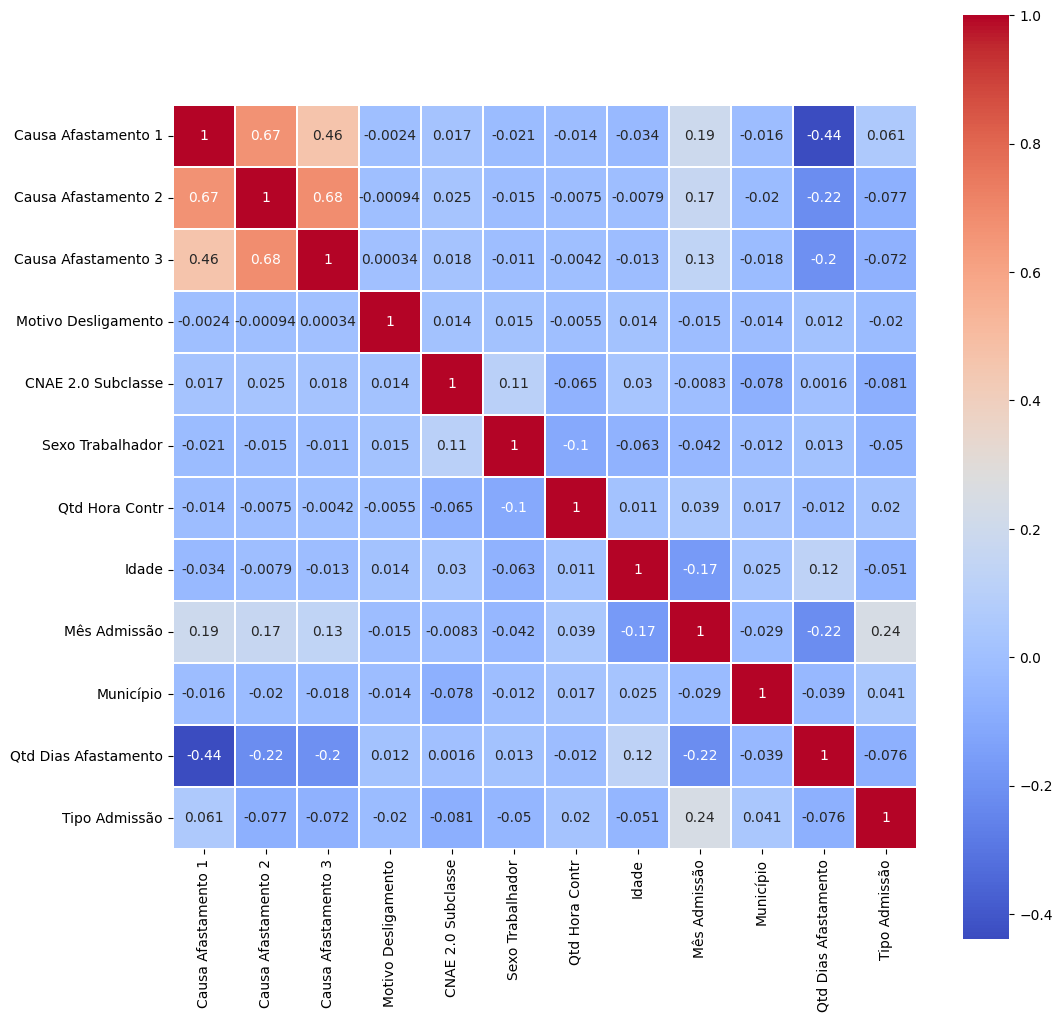

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12)) 
sns.heatmap(data=DF_.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);

In [11]:
# X é nosso dataframe
for col_name in DF_.columns:
    if DF_[col_name].dtypes == 'object':
        unique_cat = len(DF_[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique   categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'CBO Ocupação 2002' has 1204 unique   categories
Feature 'Mês Desligamento' has 1 unique   categories
Feature 'Tempo Emprego' has 3165 unique   categories


In [12]:
# listando features categoricas e numéricas:
categorical_attributes = list(DF_.select_dtypes(include=['object']).columns)
numerical_attributes = list(DF_.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['CBO Ocupação 2002', 'Mês Desligamento', 'Tempo Emprego']
numerical_attributes: ['Causa Afastamento 1', 'Causa Afastamento 2', 'Causa Afastamento 3', 'Motivo Desligamento', 'CNAE 2.0 Subclasse', 'Sexo Trabalhador', 'Qtd Hora Contr', 'Idade', 'Mês Admissão', 'Município', 'Qtd Dias Afastamento', 'Tipo Admissão']


In [13]:
DF_.dtypes

Causa Afastamento 1      int64
Causa Afastamento 2      int64
Causa Afastamento 3      int64
Motivo Desligamento      int64
CNAE 2.0 Subclasse       int64
CBO Ocupação 2002       object
Sexo Trabalhador         int64
Qtd Hora Contr           int64
Idade                    int64
Mês Admissão             int64
Mês Desligamento        object
Município                int64
Qtd Dias Afastamento     int64
Tempo Emprego           object
Tipo Admissão            int64
dtype: object

In [14]:
DF_

,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CNAE 2.0 Subclasse,CBO Ocupação 2002,Sexo Trabalhador,Qtd Hora Contr,Idade,Mês Admissão,Mês Desligamento,Município,Qtd Dias Afastamento,Tempo Emprego,Tipo Admissão
48871,99,99,99,0,4313400,517420,1,44,44,7,{ñ,500270,0,"5,5",2
48928,99,99,99,0,4120400,715505,1,44,54,11,{ñ,500370,0,"1,9",2
48961,40,40,40,0,8532500,717020,1,44,52,0,{ñ,500830,4,"22,9",0
48979,99,99,99,0,4120400,717020,1,44,62,9,{ñ,500570,0,"3,0",2
48985,99,99,99,0,4120400,717020,1,44,60,4,{ñ,500570,0,"8,3",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109352,99,99,99,0,4110700,252210,2,33,42,0,{ñ,430820,0,"23,2",4
109353,50,50,50,0,4110700,710205,2,33,31,0,{ñ,430820,153,"30,7",4
110106,99,99,99,0,4110700,411030,2,44,36,10,{ñ,431440,0,"2,8",2
110665,50,50,99,0,4120400,411010,2,33,30,0,{ñ,431490,240,"15,7",4


In [15]:
DF_ = DF_.astype({'Município':'str'})

In [16]:
DF_.dtypes

Causa Afastamento 1      int64
Causa Afastamento 2      int64
Causa Afastamento 3      int64
Motivo Desligamento      int64
CNAE 2.0 Subclasse       int64
CBO Ocupação 2002       object
Sexo Trabalhador         int64
Qtd Hora Contr           int64
Idade                    int64
Mês Admissão             int64
Mês Desligamento        object
Município               object
Qtd Dias Afastamento     int64
Tempo Emprego           object
Tipo Admissão            int64
dtype: object

In [17]:
DF_['COD_UF'] = DF_['Município'].str.slice(0, 2)
DF_ = DF_.drop('Município', axis=1)

In [18]:
DF_

,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CNAE 2.0 Subclasse,CBO Ocupação 2002,Sexo Trabalhador,Qtd Hora Contr,Idade,Mês Admissão,Mês Desligamento,Qtd Dias Afastamento,Tempo Emprego,Tipo Admissão,COD_UF
48871,99,99,99,0,4313400,517420,1,44,44,7,{ñ,0,"5,5",2,50
48928,99,99,99,0,4120400,715505,1,44,54,11,{ñ,0,"1,9",2,50
48961,40,40,40,0,8532500,717020,1,44,52,0,{ñ,4,"22,9",0,50
48979,99,99,99,0,4120400,717020,1,44,62,9,{ñ,0,"3,0",2,50
48985,99,99,99,0,4120400,717020,1,44,60,4,{ñ,0,"8,3",4,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109352,99,99,99,0,4110700,252210,2,33,42,0,{ñ,0,"23,2",4,43
109353,50,50,50,0,4110700,710205,2,33,31,0,{ñ,153,"30,7",4,43
110106,99,99,99,0,4110700,411030,2,44,36,10,{ñ,0,"2,8",2,43
110665,50,50,99,0,4120400,411010,2,33,30,0,{ñ,240,"15,7",4,43


In [19]:
DF_.groupby(['COD_UF','Idade']).sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_26372\1180129889.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DF_.groupby(['COD_UF','Idade']).sum()


Causa Afastamento 1  Causa Afastamento 2  Causa Afastamento 3  \
COD_UF Idade                                                                  
11     18                    1386                 1386                 1386   
       19                    2546                 2555                 2673   
       20                    1683                 1683                 1683   
       21                    2178                 2178                 2178   
       22                    2725                 2798                 2812   
...                           ...                  ...                  ...   
53     75                      99                   99                   99   
       76                      99                   99                   99   
       77                      99                   99                   99   
       80                     170                  170                  198   
       83                      99                   99                   99   

              Motivo Desligamento  CNAE 2.0 Subclasse  Sexo Trabalhador  \
COD_UF Idade                                                              
11     18                       0            83209303                14   
       19                       0           144584906                27   
       20                       0            85619107                17   
       21                       0            98240803                23   
       22                       0           139007607                29   
...                           ...                 ...               ...   
53     75                       0             4110700                 1   
       76                       0             4120400                 1   
       77                       0             4120400                 1   
       80                       0             8221400                 2   
       83                       0             4120400                 1   

              Qtd Hora Contr  Mês Admissão  Qtd Dias Afastamento  \
COD_UF Idade                                                       
11     18                616           127                     0   
       19               1144           170                    45   
       20                748           119                     0   
       21                968           128                     0   
       22               1228           154                   210   
...                      ...           ...                   ...   
53     75                 44             0                     0   
       76                 20             0                     0   
       77                 44             0                     0   
       80                 88             0                   124   
       83                 20             0                     0   

              Tipo Admissão  
COD_UF Idade                 
11     18                29  
       19                53  
       20                35  
       21                48  
       22                55  
...                     ...  
53     75                 0  
       76                 0  
       77                 0  
       80                 0  
       83                 0  

[1667 rows x 10 columns]

In [20]:
DF_.groupby(['COD_UF']).sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_26372\1565259114.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DF_.groupby(['COD_UF']).sum()


,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CNAE 2.0 Subclasse,Sexo Trabalhador,Qtd Hora Contr,Idade,Mês Admissão,Qtd Dias Afastamento,Tipo Admissão
COD_UF,,,,,,,,,,,
11,147728,154426,157548,22,8041495827,1670,68459,62450,7024,34957,2997
12,133020,141139,146008,11,8169937610,1583,64642,57561,5228,35674,2351
13,299349,305226,308847,128,13468597061,3309,136306,121514,13545,31408,6780
14,53196,53863,55465,33,2422018507,578,24778,22393,2991,4299,1293
15,1284200,1342438,1364212,2038,68072355249,15452,599462,530927,55444,252567,21079
16,64892,65988,66442,0,4484188487,695,29446,25391,3113,8751,1323
17,188890,195893,199073,0,9562084564,2092,88220,79113,10406,22951,3706
21,904210,939552,962712,73,43571198301,10684,431028,388436,37008,188911,18745
22,705999,738361,751471,1809,34264200959,8053,336308,308694,29906,304035,12694


In [21]:
DF_.groupby(['COD_UF'])['Qtd Dias Afastamento','Qtd Hora Contr'].sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_26372\171736613.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DF_.groupby(['COD_UF'])['Qtd Dias Afastamento','Qtd Hora Contr'].sum()


,Qtd Dias Afastamento,Qtd Hora Contr
COD_UF,,
11,34957,68459
12,35674,64642
13,31408,136306
14,4299,24778
15,252567,599462
16,8751,29446
17,22951,88220
21,188911,431028
22,304035,336308


In [22]:
DF__ = DF_.groupby(['COD_UF'])['Qtd Dias Afastamento','Qtd Hora Contr'].sum()
DF__

C:\Users\PC\AppData\Local\Temp\ipykernel_26372\225618183.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DF__ = DF_.groupby(['COD_UF'])['Qtd Dias Afastamento','Qtd Hora Contr'].sum()


,Qtd Dias Afastamento,Qtd Hora Contr
COD_UF,,
11,34957,68459
12,35674,64642
13,31408,136306
14,4299,24778
15,252567,599462
16,8751,29446
17,22951,88220
21,188911,431028
22,304035,336308


In [23]:
DF__['Qtd Dias Contr'] = DF__['Qtd Hora Contr']/8766

In [24]:
DF__

,Qtd Dias Afastamento,Qtd Hora Contr,Qtd Dias Contr
COD_UF,,,
11,34957,68459,7.809605
12,35674,64642,7.374173
13,31408,136306,15.549395
14,4299,24778,2.826603
15,252567,599462,68.384896
16,8751,29446,3.359115
17,22951,88220,10.063883
21,188911,431028,49.170431
22,304035,336308,38.365047


In [25]:
DF__['Taxa Absenteismo por UF'] = DF__['Qtd Dias Contr']/DF__['Qtd Dias Afastamento']

In [26]:
DF__

,Qtd Dias Afastamento,Qtd Hora Contr,Qtd Dias Contr,Taxa Absenteismo por UF
COD_UF,,,,
11,34957,68459,7.809605,0.000223
12,35674,64642,7.374173,0.000207
13,31408,136306,15.549395,0.000495
14,4299,24778,2.826603,0.000658
15,252567,599462,68.384896,0.000271
16,8751,29446,3.359115,0.000384
17,22951,88220,10.063883,0.000438
21,188911,431028,49.170431,0.000260
22,304035,336308,38.365047,0.000126


# MODELANDO

In [27]:
#df = df.select_dtypes(exclude=['object'])
#df=df.fillna(df.mean())
X = DF__.drop('Taxa Absenteismo por UF',axis=1)

y = DF__['Taxa Absenteismo por UF']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
y_pred

array([0.00025908, 0.00026539, 0.00027481, 0.00028224, 0.00054118,
       0.00020609, 0.00025981, 0.00026312, 0.00035485])

In [34]:
import pandas as pd
import numpy as np
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
COD_UF,,
13,0.000495,0.000259
51,0.000399,0.000265
28,0.000098,0.000275
32,0.000329,0.000282
16,0.000384,0.000541
25,0.000182,0.000206
50,0.000355,0.000260
27,0.000211,0.000263
35,0.000445,0.000355


In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.00011257696933423319
Mean Squared Error: 1.6946402657522227e-08
Root Mean Squared Error: 0.00013017834941925723


In [36]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: 55.23 %.


C:\Users\PC\AppData\Local\Temp\ipykernel_26372\451732809.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\PC\AppData\Local\Temp\ipykernel_26372\451732809.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,

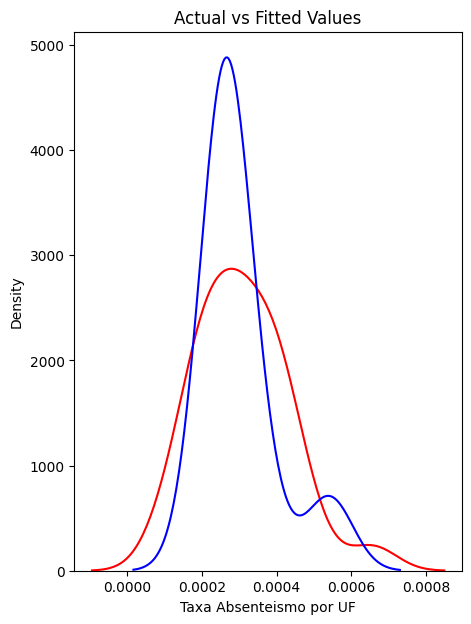

In [37]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()
plt.close()


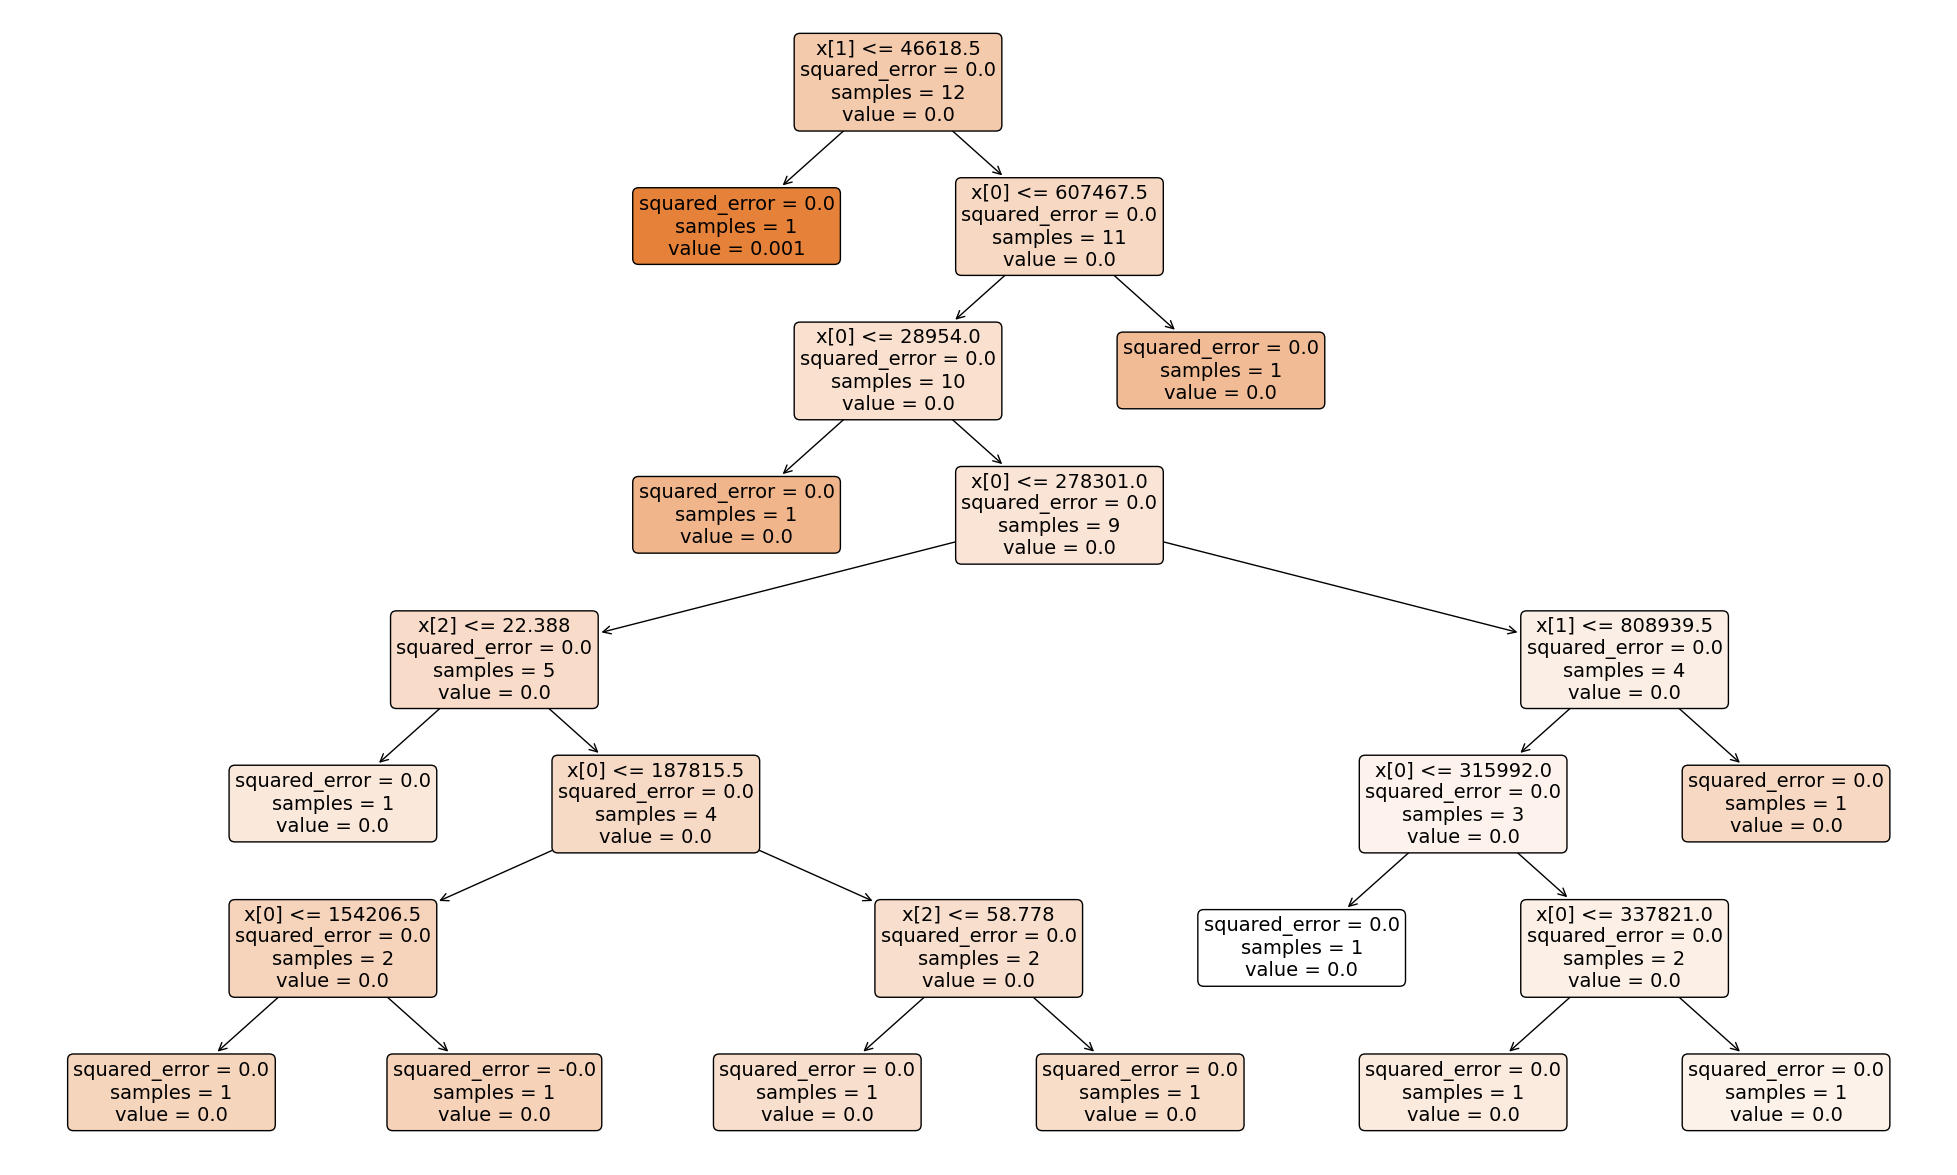

In [38]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
_DF = DF__.reset_index()
_DF = _DF.drop('COD_UF', axis=1)
_DF

X_ = _DF.drop('Taxa Absenteismo por UF',axis=1)

Y_ = _DF['Taxa Absenteismo por UF']

In [59]:
Decision_tree = DecisionTreeRegressor()

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [61]:
Decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [62]:
pred = Decision_tree.predict(X_test)

In [63]:
pred

array([0.00021059, 0.00021059, 0.00018192, 0.00038912, 0.00018192,
       0.00018192, 0.00021059, 0.00035499, 0.00022341])

In [64]:
Decision_tree.predict(X_test)

array([0.00021059, 0.00021059, 0.00018192, 0.00038912, 0.00018192,
       0.00018192, 0.00021059, 0.00035499, 0.00022341])

In [65]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.00010638341302837984
Mean Squared Error: 1.9373645997948177e-08
Root Mean Squared Error: 0.00013918924526682433


In [66]:
# Calculate the absolute errors
errors = abs(pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: 47.66 %.
